# 区域经济导致直接/非直接用水差异

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

city_yr = pd.read_csv(r"..\data\perfectures\yr\perfectures_in_YR_with_threshold_0.05.csv")
city_yr.head()

,City_ID,Year,IRR,Irrigated area: Total,Irrigated area: Rice,Irrigated area: Wheat,Irrigated area: Maize,Irrigated area: Vegetables and fruits,Irrigated area: Others,Irrigation water-use intensity (WUI): Total,Irrigation water-use intensity (WUI): Rice,Irrigation water-use intensity (WUI): Wheat,Irrigation water-use intensity (WUI): Maize,Irrigation water-use intensity (WUI): Vegetables and fruits,Irrigation water-use intensity (WUI): Others,IND,Industrial gross value added (GVA): Total,Industrial gross value added (GVA): Textile,Industrial gross value added (GVA): Papermaking,Industrial gross value added (GVA): Petrochemicals,Industrial gross value added (GVA): Metallurgy,Industrial gross value added (GVA): Mining,Industrial gross value added (GVA): Food,Industrial gross value added (GVA): Cements,Industrial gross value added (GVA): Machinery,Industrial gross value added (GVA): Electronics,Industrial gross value added (GVA): Thermal electrivity,Industrial gross value added (GVA): Others,Industrial WUI: Total,Industrial WUI: Textile,Industrial WUI: Papermaking,Industrial WUI: Petrochemicals,Industrial WUI: Metallurgy,Industrial WUI: Mining,Industrial WUI: Food,Industrial WUI: Cements,Industrial WUI: Machinery,Industrial WUI: Electronics,Industrial WUI: Thermal electrivity,Industrial WUI: Others,URB,Urban domestic WU,Urban population,Urban domestic WUI,Urban service WU,Service GVA,Service WUI,RUR,Rural domestic WU,Rural population,Rural domestic WUI,Rural livestock WU,Livestock population,Livestock WUI,Total water use,Province_n,Area_calcu,Region,Intersect_area,Ratio
0,C27,1965,0.300518,46.631997,0.391448,16.089679,1.152312,0.571298,28.427261,644.445209,965.436106,645.997368,823.675868,870.929280,627.329790,0.011766,0.085196,0.048853,0.001318,0.008171,0.005380,0.002229,0.002642,0.003103,0.001592,0.003239,0.001065,0.007603,0.138109,0.090024,0.890478,0.083890,0.100508,0.087858,0.111445,0.172875,0.051626,0.110443,0.409668,0.403208,0.007281,0.005398,0.150229,98.438077,0.001883,0.024149,0.077970,0.009021,0.005818,0.499787,31.895556,0.003203,141.750766,0.022595,0.328586,Gansu,20091.467281,UR,19188.439369,0.955054
1,C27,1966,0.323595,49.468303,0.383836,16.485679,1.434736,0.636613,30.527440,654.146772,979.121070,655.154319,835.351394,883.274620,636.222130,0.011997,0.110722,0.054043,0.001560,0.010015,0.006783,0.002843,0.003321,0.003813,0.002013,0.003833,0.001381,0.021116,0.108350,0.057868,0.572406,0.053925,0.064607,0.056476,0.071638,0.111125,0.033186,0.070994,0.263338,0.259185,0.007335,0.005488,0.155426,96.730940,0.001848,0.036026,0.051291,0.009069,0.005733,0.553613,28.371723,0.003336,147.646616,0.022592,0.351996,Gansu,20091.467281,UR,19188.439369,0.955054
2,C27,1967,0.340063,52.309331,0.416675,17.803304,1.442818,0.697033,31.949501,650.100439,973.012862,651.067165,830.140088,877.764346,632.253084,0.017226,0.108366,0.069168,0.002138,0.014211,0.009900,0.004196,0.004829,0.005422,0.002946,0.005247,0.002071,0.000000,0.158964,0.112848,1.116240,0.105158,0.125990,0.110133,0.139700,0.216703,0.064715,0.138444,0.513531,0.000000,0.007080,0.005393,0.160802,91.883628,0.001687,0.028569,0.059049,0.008063,0.004650,0.605625,21.033715,0.003413,151.033245,0.022600,0.372432,Gansu,20091.467281,UR,19188.439369,0.955054
3,C27,1968,0.352690,53.870788,0.437429,18.863369,1.514685,0.770592,32.284713,654.695280,979.011409,655.080942,835.257835,883.175693,636.150874,0.022493,0.102236,0.058920,0.001950,0.013432,0.009625,0.004121,0.004673,0.005132,0.002869,0.004781,0.002068,0.000000,0.220014,0.162935,1.611673,0.151832,0.181909,0.159015,0.201705,0.312885,0.093439,0.199891,0.741457,0.000000,0.007466,0.005647,0.166365,92.999030,0.001818,0.027334,0.066526,0.008809,0.005322,0.655823,22.233352,0.003487,154.266500,0.022604,0.391458,Gansu,20091.467281,UR,19188.439369,0.955054
4,C27,1969,0.365740,55.120730,0.447621,19.700679,1.549920,0.752680,32.669830,663.524461,992.248499,663.938209,846.551251,895.117001,644.752189,0.019751,0.127896,0.054400,0.001927,0.013772,0.010150,0.0043

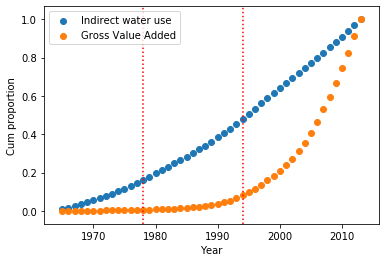

In [44]:
# 产生直接惠益的用水方式
direct = ['IRR', 'Urban domestic WU', 'Rural domestic WU', 'Rural livestock WU']

# 产生间接惠益的用水方式
undirect = ['IND', 'Urban service WU']

# 间接用水量
undirect_water_use = city_yr.groupby('Year').sum()[undirect]

# 服务业和工业的产值
gva_cols = ['Service GVA', 'Industrial gross value added (GVA): Total']
gva = city_yr.groupby("Year").sum()[gva_cols]


plt.scatter(
    x=undirect_water_use.index, 
    y=undirect_water_use.cumsum().sum(axis=1).values / undirect_water_use.sum().sum(),
    label='Indirect water use'
)

plt.scatter(
    x=gva.index, 
    y=gva.cumsum().sum(axis=1).values / gva.sum().sum(),
    label='Gross Value Added'
)


plt.xlabel("Year")
plt.ylabel("Cum proportion")
plt.legend()
plt.axvline(1978, ls=":", color="red")
plt.axvline(1994, ls=":", color="red")
plt.show();

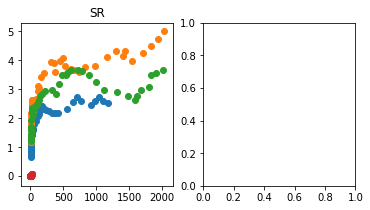

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
axs = [ax1, ax2, ax3, ax4]

periods = {
    'P1': (1965, 1978),
    'P2': (1979, 1993),
    'P3': (1994, 2013)
}

regions = city_yr['Region'].unique()

rel_self = pd.DataFrame(index=regions, columns=periods.keys())
rel_out = pd.DataFrame(index=regions, columns=periods.keys())

for i, region in enumerate(regions):
    gva_yr = city_yr.groupby('Year').sum()[gva_cols].sum(axis=1)
    data = city_yr[city_yr['Region'] == region]
    wu_all = data.groupby('Year').sum()[undirect].sum(axis=1)
    gva_all = data.groupby('Year').sum()[gva_cols].sum(axis=1)


    for period in periods:
        start, end = periods[period]
        wu = data.groupby('Year').sum()[undirect].sum(axis=1).loc[start:end+1]
        gva = data.groupby('Year').sum()[gva_cols].sum(axis=1).loc[start:end+1]
        r_self, p_self = stats.pearsonr(wu, gva)  # 相关系数和P值
        r_out, p_out = stats.pearsonr(wu, gva_yr.loc[start:end+1])
        
        rel_out.loc[region, period] = r_out
        rel_self.loc[region, period] = r_self
    ax1.scatter(gva_all, wu_all)
    ax1.set_title(region)

plt.show();

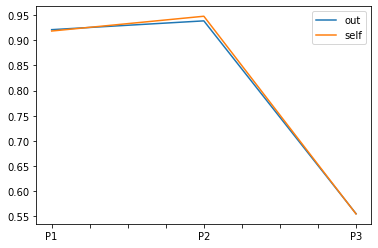

In [35]:
rel_out.mean().plot(label='out')
rel_self.mean().plot(label='self')
plt.errorbar()
plt.legend()
plt.show();